In [102]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

In [2]:
housing = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)
housing.columns = ["crime_rate", "zoned_land", "industry", "bounds_river", 
                   "nox_conc", "rooms", "age", "distance", "highways", "tax", 
                   "pt_ratio", "b_estimator",  "pop_status", "price"]
housing.head()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
housing.shape

(506, 14)

Printing correlation matrix

In [4]:
housing.corr()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
crime_rate,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
zoned_land,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
industry,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
bounds_river,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox_conc,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
highways,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
tax,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


Above coefficients are calculated based on Pearson correlation coefficient. Example given bellow for correlation between crime_rate and industry.

In [5]:
#round(scipy.stats.pearsonr(housing.crime_rate, housing.industry)[0],6)
float("{0:.6f}".format(scipy.stats.pearsonr(housing.crime_rate, housing.industry)[0]))

0.590822

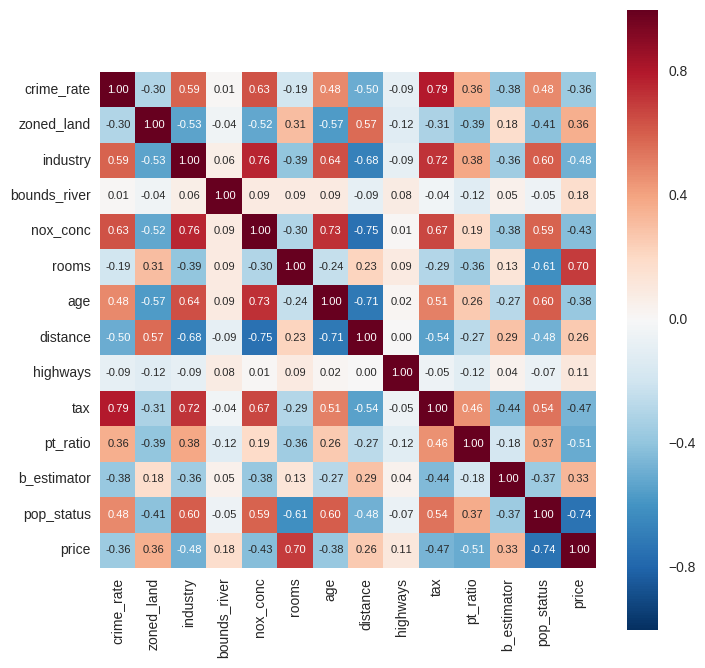

In [6]:
plt.figure(figsize=(8,8))

sns.heatmap(housing.corr(), annot=True, fmt=".2f", annot_kws={"size": 8}, square = True)
plt.show()

Correlations of attribute pairs of selected attributes

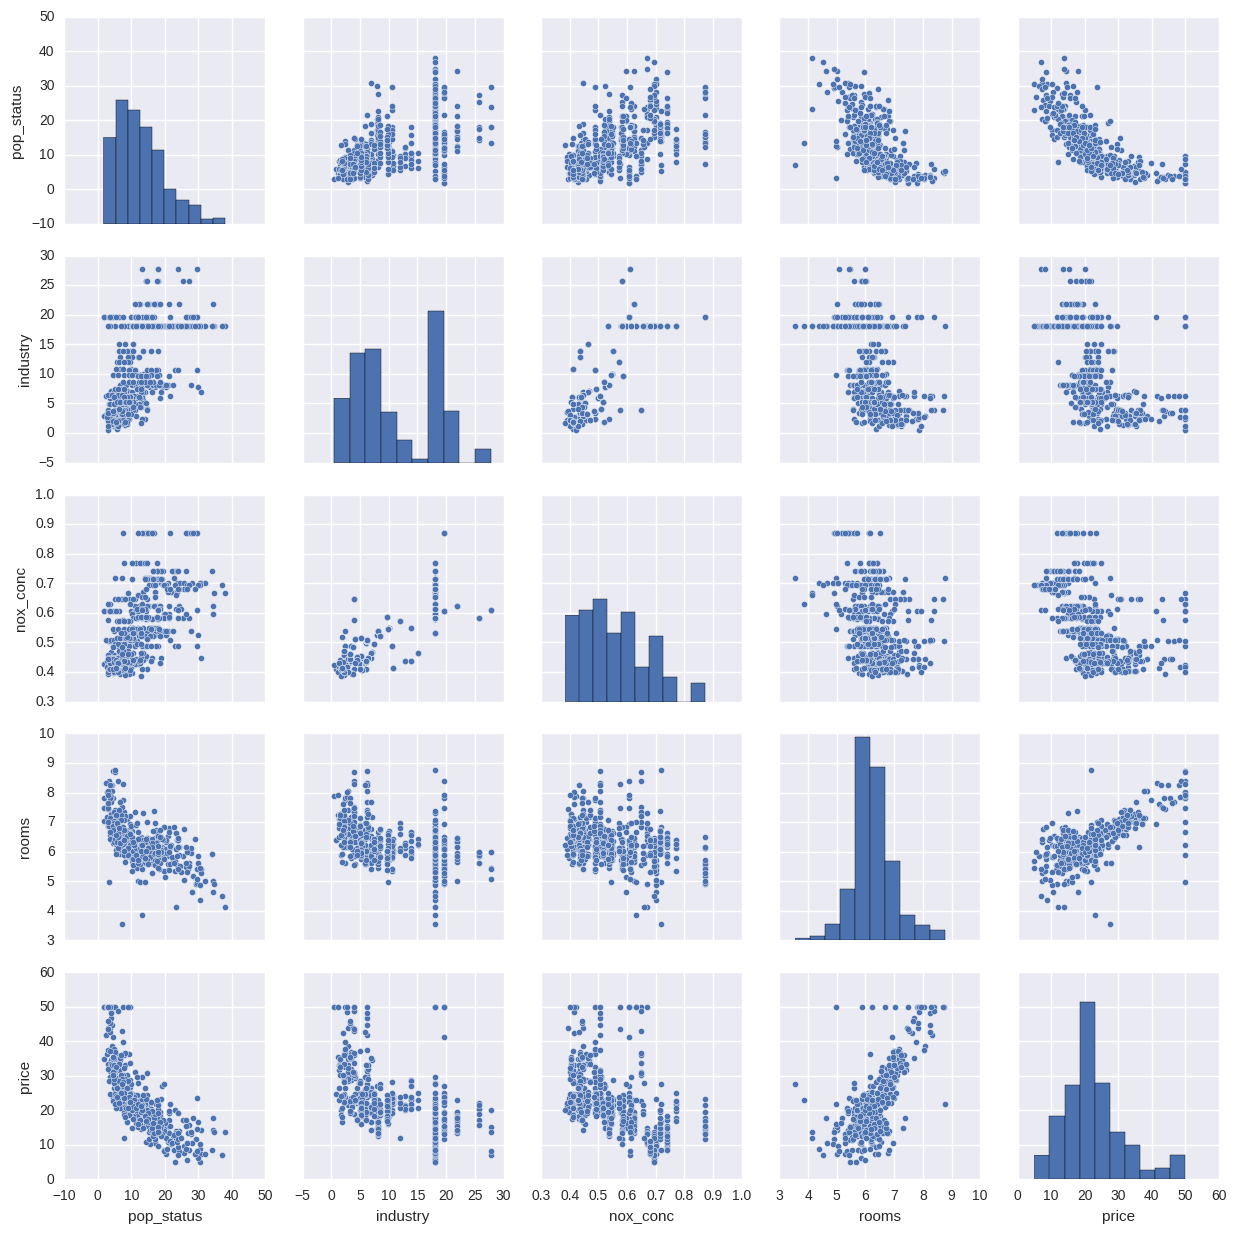

In [7]:
sns.pairplot(housing[["pop_status", "industry", "nox_conc", "rooms", "price"]])

We can say that most of the attributes correlates with the price linearly. Each factor with some weight some intercept can give a model for valuation of a house

Creating housing model. Removing price as column from the training data (otherwise we will have corellation 1)

In [8]:
housing_model = LinearRegression()
housing_model.fit(housing.drop("price", axis=1), housing.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print(housing_model.coef_, housing_model.intercept_)

[  2.09281375e-01   1.49403979e-02   1.27164577e-02   3.00565375e+00
  -1.55234852e+01   4.29955958e+00   2.84848139e-03  -1.08366345e+00
   1.93258621e-01  -2.42034372e-03  -9.65535221e-01   9.43510233e-03
  -5.25242783e-01] 28.3051107501


We can say a base price by the intercept 28.30 ...

To test we get a random 5 housing data

In [10]:
indices = np.random.randint(0, len(housing), 5)  # get random indices from housing dataset
houses = housing.ix[indices]
houses

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
484,2.37857,0.0,18.10,0,0.5830,5.871,41.9,3.7240,4,666.0,20.2,370.73,13.34,20.6
491,0.10574,0.0,27.74,0,0.6090,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76,45.4
112,0.12329,0.0,10.01,0,0.5470,5.913,92.9,2.3534,6,432.0,17.8,394.95,16.21,18.8
391,5.29305,0.0,18.10,0,0.7000,6.051,82.5,2.1678,4,666.0,20.2,378.38,18.76,23.2


In [11]:
predicted = housing_model.predict(houses.drop("price", axis = 1))
print(predicted)
print(houses.price)

[ 17.45779101  17.04199829  38.23362987  21.244129    16.0528184 ]
484    20.6
491    13.6
280    45.4
112    18.8
391    23.2
Name: price, dtype: float64


Comparing predicted prices with housing pice

In [62]:
diff_sum = []
for i,v in enumerate(houses.price):
    diff = ((v - predicted[i]) / v) * 100

    diff_sum.append(diff)
    print("Real: {:.2f}, Predicted: {:.2f}, Difference: {:.2f}".format(v, predicted[i], diff))

Real: 20.60, Predicted: 15.69, Difference: 23.86
Real: 13.60, Predicted: 15.39, Difference: -13.15
Real: 45.40, Predicted: 40.32, Difference: 11.19
Real: 18.80, Predicted: 18.69, Difference: 0.59
Real: 23.20, Predicted: 14.80, Difference: 36.22


In [64]:
print("\n")
print("Thus we can see that the error is: ", round(sum(diff_sum)/len(diff_sum), 2))



Thus we can see that the error is:  11.74


In [12]:
sum(predicted)

110.0303665767629

In [13]:
sum(houses.price)

121.59999999999999

In [14]:
(sum(houses.price) - sum(predicted) )/ sum(predicted)

0.10514945812859322

In [15]:
print(predicted - houses.price)

484   -3.142209
491    3.441998
280   -7.166370
112    2.444129
391   -7.147182
Name: price, dtype: float64


We can see how acurate is our algorithm by finding the ** coefficient of determination ** - r2_score(y_true, y_pred) 

In [16]:
first_alg = r2_score(houses.price, predicted)
print(first_alg)

0.784848983908


Conclution: 78% of all examples are predicted with this model

#### To exclude outliers we can apply RANSAC (RANdom SAmple Consensus) method

In [17]:
ransac = RANSACRegressor()
ransac.fit(housing.drop("price", axis = 1), housing.price)
print(ransac.estimator_.coef_, ransac.estimator_.intercept_)

[ -9.90753525e-02   1.24678214e-01   1.60392254e-01   2.25375982e-01
  -5.00185260e+00   3.48057489e+00  -5.64524018e-02  -1.58780357e+00
   9.89560319e-01  -2.58586893e-03  -6.23898396e-01   1.38473661e-02
  -5.44112664e-01] 19.2989425244


We have trained our model in the way RANSAC method works

** Comparing one linear regression with RANSAC regression **

We need to find out whether we perform better. In order to do this we have to compare with our housing model

In [18]:
predicted = ransac.estimator_.predict(houses.drop("price", axis = 1))
second_alg = r2_score(houses.price, predicted)
print(second_alg)

0.675608206621


Trying different initialization

In [19]:
ransac = RANSACRegressor(LinearRegression(), min_samples = 50, max_trials = 100, residual_threshold = 5.0)
ransac.fit(housing.drop("price", axis = 1), housing.price)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=50, random_state=None, residual_metric=None,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [20]:
predicted = ransac.estimator_.predict(houses.drop("price", axis = 1))
third_alg = r2_score(houses.price, predicted)
print(third_alg)

0.79529652157


After comparison of the three algorithms we can determine which is working better, in our case the last one

In [25]:
print("The difference between the first and the last algorithm is:  {:.2f}%".format((third_alg-first_alg) * 100))

The difference between the first and the last algorithm is:  1.04%


In addition to ransac model, we can see the distribution of inliers and outliers

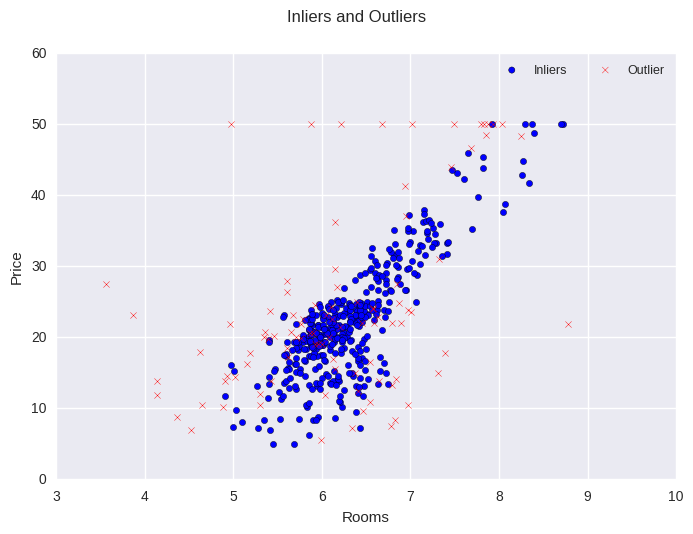

In [96]:
inliers = housing[ransac.inlier_mask_]
outliers = housing[~ransac.inlier_mask_]
inl = plt.scatter(inliers.rooms, inliers.price)
outl = plt.scatter(outliers.rooms, outliers.price,  color='r', marker='x')
plt.suptitle('Inliers and Outliers')
plt.xlabel("Rooms")
plt.ylabel("Price")
leg = plt.legend((inl,outl),
           ('Inliers', 'Outlier'),
           scatterpoints=1,
           loc='upper right',
           ncol=4,
           fontsize=9)